In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container {width: 90% !important; }</style>'))

In [2]:
import sys
sys.path.append("../../simpsom")
import simpsom as sps

import pandas as pd
import numpy as np

In [3]:
from sklearn.datasets import load_digits
digits = load_digits()
df = pd.DataFrame(digits.data, columns=digits.feature_names)
labels = digits.target
data = np.array(df)

In [4]:
def run_experiment(data, PBC=True, init='PCA', metric='euclidean', topology='hexagonal', 
               GPU=False, neighborhood_fun='gaussian', train_algo='batch', early_stop=None,
               plotall=False, size=10, epochs=10):

    net = sps.SOMNet(size, size, data, PBC=PBC, init=init, metric=metric, random_seed=32, GPU=GPU, debug=True)
    net.train(train_algo=train_algo, start_learning_rate=0.01, epochs=epochs, batch_size=-1, early_stop=early_stop)

    if plotall:

        net.plot_map_by_feature(feature=1, show=True, print_out=False)
        _ = net.plot_map_by_difference(show=True, print_out=False, returns=False)

        _ = net.plot_projected_points(net.project_onto_map(data), 
                                     project=False, jitter=True, 
                                     show=True, print_out=False)
        _ = net.plot_projected_points(data, color_val=[n.difference for n in net.node_list],
                                     project=True, jitter=True, 
                                     show=True, print_out=False)

        labs, points = net.cluster(data, algorithm='AgglomerativeClustering')
        net.plot_clusters(data, labs, project=True, show=True)
        labs, points = net.cluster(data, algorithm='DBSCAN')
        net.plot_clusters(data, labs, project=True, show=True)
        labs, points = net.cluster(data, algorithm='KMeans')
        net.plot_clusters(data, labs, project=True, show=True)

        net.plot_convergence(fsize=(5, 5), logax=False)

In [5]:
GPU=False

confs = [
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'cosine', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'manhattan', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': True, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'square', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'mexican', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'bubble', 'train_algo':'online', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'batch', 'early_stop':None, 'plotall':False},
{'PBC': True, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'batch', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'cosine', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'batch', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'manhattan', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'batch', 'early_stop':None, 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':'bmudiff', 'plotall':False},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':'mapdiff', 'plotall':False}, 
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'hexagonal', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'batch', 'early_stop':'mapdiff', 'plotall':True},
{'PBC': False, 'init':'PCA', 'metric':'euclidean', 'topology':'square', 'GPU':GPU, 'neighborhood_fun':'gaussian', 'train_algo':'online', 'early_stop':None, 'plotall':True},
]

2022-06-11 15:52:46.611 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2022-06-11 15:52:46.612 | INFO     | simpsom.network:_set_weights:170 - The weights will be initialized with PCA.
2022-06-11 15:52:46.617 | INFO     | simpsom.network:train:362 - The map will be trained with the online algorithm.
2022-06-11 15:52:46.618 | WARNING  | simpsom.network:_randomize_dataset:265 - Epochs for online training are less than the input datapoints.
2022-06-11 15:52:46.619 | WARNING  | simpsom.network:_randomize_dataset:270 - [ 729 1696  171 ... 1334 1579  727]
Training SOM... 0%6.620 | DEBUG    | simpsom.network:train:390 - 
2022-06-11 15:52:46.650 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2022-06-11 15:52:46.651 | INFO     | simpsom.network:_set_weights:170 - The weights will be initialized with PCA.
2022-06-11 15:52:46.657 | INFO     | simpsom.network:train:362 - The map will be trained with the online algorithm.
2022-06-11 15:52:46.678 | WARNING  | simpso

CPU
{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': None, 'plotall': False}
{'PBC': False, 'init': 'PCA', 'metric': 'cosine', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': None, 'plotall': False}
{'PBC': False, 'init': 'PCA', 'metric': 'manhattan', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': None, 'plotall': False}


2022-06-11 15:52:46.747 | INFO     | simpsom.network:__init__:106 - Periodic Boundary Conditions active.
2022-06-11 15:52:46.748 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2022-06-11 15:52:46.749 | INFO     | simpsom.network:_set_weights:170 - The weights will be initialized with PCA.
2022-06-11 15:52:46.753 | INFO     | simpsom.network:train:362 - The map will be trained with the online algorithm.
2022-06-11 15:52:46.755 | WARNING  | simpsom.network:_randomize_dataset:265 - Epochs for online training are less than the input datapoints.
2022-06-11 15:52:46.756 | WARNING  | simpsom.network:_randomize_dataset:270 - [ 729 1696  171 ... 1334 1579  727]
Training SOM... 0%6.757 | DEBUG    | simpsom.network:train:390 - 
2022-06-11 15:52:46.871 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2022-06-11 15:52:46.873 | INFO     | simpsom.network:_set_weights:170 - The weights will be initialized with PCA.
2022-06-11 15:52:46.877 | INFO     | simpsom.network:t

{'PBC': True, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': None, 'plotall': False}
{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'square', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': None, 'plotall': False}
{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'mexican', 'train_algo': 'online', 'early_stop': None, 'plotall': False}
{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'bubble', 'train_algo': 'online', 'early_stop': None, 'plotall': False}


2022-06-11 15:52:46.947 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2022-06-11 15:52:46.949 | INFO     | simpsom.network:_set_weights:170 - The weights will be initialized with PCA.
2022-06-11 15:52:46.954 | INFO     | simpsom.network:train:362 - The map will be trained with the online algorithm.
2022-06-11 15:52:46.956 | WARNING  | simpsom.network:_randomize_dataset:265 - Epochs for online training are less than the input datapoints.
2022-06-11 15:52:46.957 | WARNING  | simpsom.network:_randomize_dataset:270 - [ 729 1696  171 ... 1334 1579  727]
Training SOM... 0%6.958 | DEBUG    | simpsom.network:train:390 - 
2022-06-11 15:52:46.984 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2022-06-11 15:52:46.985 | INFO     | simpsom.network:_set_weights:170 - The weights will be initialized with PCA.
2022-06-11 15:52:46.989 | INFO     | simpsom.network:train:362 - The map will be trained with the batch algorithm.
Training SOM... 0%6.991 | DEBUG    | simpsom

{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'batch', 'early_stop': None, 'plotall': False}


2022-06-11 15:52:47.387 | INFO     | simpsom.network:__init__:106 - Periodic Boundary Conditions active.
2022-06-11 15:52:47.389 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2022-06-11 15:52:47.390 | INFO     | simpsom.network:_set_weights:170 - The weights will be initialized with PCA.
2022-06-11 15:52:47.394 | INFO     | simpsom.network:train:362 - The map will be trained with the batch algorithm.
2022-06-11 15:52:47.396 | WARNING  | simpsom.network:train:414 - PBC currently unavailable for batch training and will be turned off.
Training SOM... 0%7.398 | DEBUG    | simpsom.network:train:461 - 


{'PBC': True, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'batch', 'early_stop': None, 'plotall': False}


2022-06-11 15:52:47.825 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2022-06-11 15:52:47.828 | INFO     | simpsom.network:_set_weights:170 - The weights will be initialized with PCA.
2022-06-11 15:52:47.834 | INFO     | simpsom.network:train:362 - The map will be trained with the batch algorithm.
Training SOM... 0%7.838 | DEBUG    | simpsom.network:train:461 - 


{'PBC': False, 'init': 'PCA', 'metric': 'cosine', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'batch', 'early_stop': None, 'plotall': False}


/Users/federico comitani/GitHub/simpsom/simpsom/distances.py:46: RuntimeWarning: invalid value encountered in true_divide
  similarity = self.xp.nan_to_num(num/denum)
2022-06-11 15:52:48.338 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2022-06-11 15:52:48.339 | INFO     | simpsom.network:_set_weights:170 - The weights will be initialized with PCA.
2022-06-11 15:52:48.345 | INFO     | simpsom.network:train:362 - The map will be trained with the batch algorithm.
Training SOM... 0%8.347 | DEBUG    | simpsom.network:train:461 - 


{'PBC': False, 'init': 'PCA', 'metric': 'manhattan', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'batch', 'early_stop': None, 'plotall': False}


2022-06-11 15:52:48.842 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2022-06-11 15:52:48.843 | INFO     | simpsom.network:_set_weights:170 - The weights will be initialized with PCA.
2022-06-11 15:52:48.849 | INFO     | simpsom.network:train:362 - The map will be trained with the online algorithm.
2022-06-11 15:52:48.852 | WARNING  | simpsom.network:_randomize_dataset:265 - Epochs for online training are less than the input datapoints.
2022-06-11 15:52:48.854 | WARNING  | simpsom.network:_randomize_dataset:270 - [ 729 1696  171 ... 1334 1579  727]
Training SOM... 0%8.856 | DEBUG    | simpsom.network:train:390 - 
2022-06-11 15:52:48.882 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2022-06-11 15:52:48.884 | INFO     | simpsom.network:_set_weights:170 - The weights will be initialized with PCA.
2022-06-11 15:52:48.889 | INFO     | simpsom.network:train:362 - The map will be trained with the online algorithm.
2022-06-11 15:52:48.891 | WARNING  | simpso

{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': 'bmudiff', 'plotall': False}
{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': 'mapdiff', 'plotall': False}
{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'hexagonal', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'batch', 'early_stop': 'mapdiff', 'plotall': True}


Early stop tolerance reached at epoch 4, stopping training.454 - 


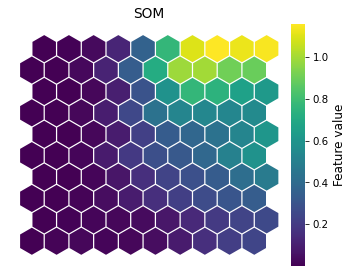

2022-06-11 15:52:49.376 | INFO     | simpsom.network:get_nodes_difference:552 - Weights difference among neighboring nodes calculated.


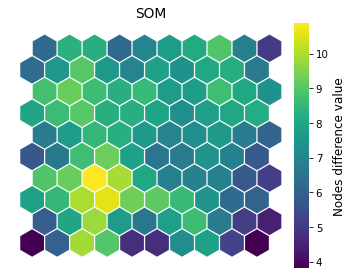

2022-06-11 15:52:49.529 | INFO     | simpsom.network:project_onto_map:579 - Projected coordinates will be saved to:
././som_projected.npy


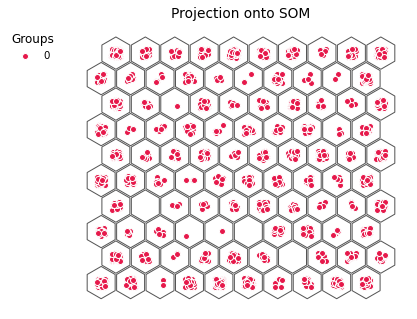

2022-06-11 15:52:49.667 | INFO     | simpsom.network:project_onto_map:579 - Projected coordinates will be saved to:
././som_projected.npy


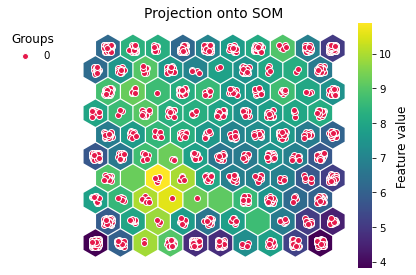

2022-06-11 15:52:49.883 | INFO     | simpsom.network:project_onto_map:579 - Projected coordinates will be saved to:
././som_projected.npy
2022-06-11 15:52:49.946 | INFO     | simpsom.network:cluster:648 - Clustering results will be saved to:
././som_clusters.npy
2022-06-11 15:52:49.953 | INFO     | simpsom.network:project_onto_map:579 - Projected coordinates will be saved to:
././som_projected.npy


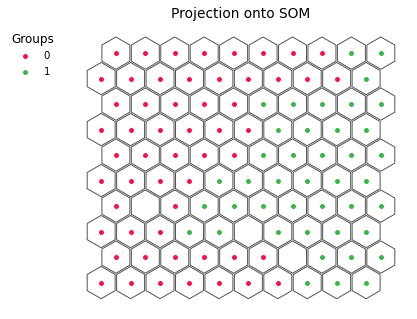

2022-06-11 15:52:50.509 | INFO     | simpsom.network:plot_clusters:849 - Clustering plot will be saved to:
././som_clustering.png
2022-06-11 15:52:50.515 | INFO     | simpsom.network:project_onto_map:579 - Projected coordinates will be saved to:
././som_projected.npy
2022-06-11 15:52:50.527 | INFO     | simpsom.network:cluster:648 - Clustering results will be saved to:
././som_clusters.npy
2022-06-11 15:52:50.534 | INFO     | simpsom.network:project_onto_map:579 - Projected coordinates will be saved to:
././som_projected.npy


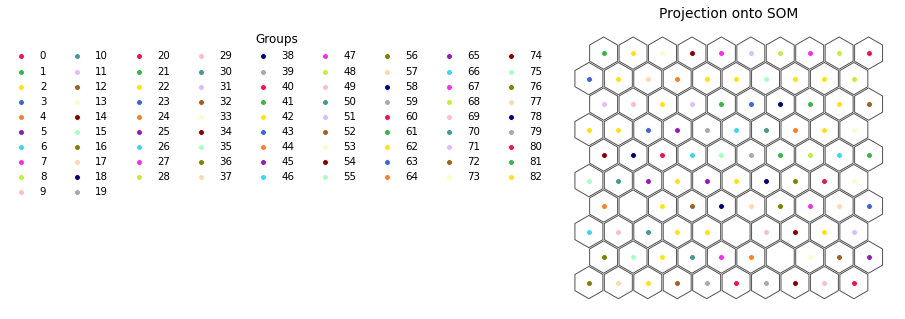

2022-06-11 15:52:55.204 | INFO     | simpsom.network:plot_clusters:849 - Clustering plot will be saved to:
././som_clustering.png
2022-06-11 15:52:55.212 | INFO     | simpsom.network:project_onto_map:579 - Projected coordinates will be saved to:
././som_projected.npy
2022-06-11 15:52:55.298 | INFO     | simpsom.network:cluster:648 - Clustering results will be saved to:
././som_clusters.npy
2022-06-11 15:52:55.306 | INFO     | simpsom.network:project_onto_map:579 - Projected coordinates will be saved to:
././som_projected.npy


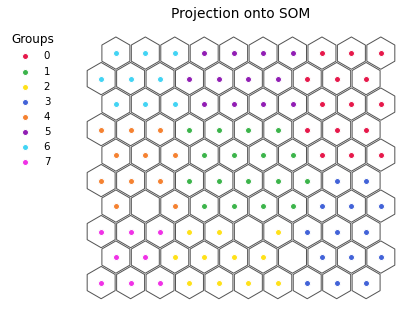

2022-06-11 15:52:56.161 | INFO     | simpsom.network:plot_clusters:849 - Clustering plot will be saved to:
././som_clustering.png
2022-06-11 15:52:56.541 | INFO     | simpsom.network:plot_convergence:760 - Convergence results will be saved to:
././som_convergence.png
2022-06-11 15:52:56.547 | INFO     | simpsom.network:__init__:115 - Hexagonal topology.
2022-06-11 15:52:56.549 | INFO     | simpsom.network:_set_weights:170 - The weights will be initialized with PCA.
2022-06-11 15:52:56.556 | INFO     | simpsom.network:train:362 - The map will be trained with the online algorithm.
2022-06-11 15:52:56.558 | WARNING  | simpsom.network:_randomize_dataset:265 - Epochs for online training are less than the input datapoints.
2022-06-11 15:52:56.561 | WARNING  | simpsom.network:_randomize_dataset:270 - [ 729 1696  171 ... 1334 1579  727]
Training SOM... 0%6.563 | DEBUG    | simpsom.network:train:390 - 


{'PBC': False, 'init': 'PCA', 'metric': 'euclidean', 'topology': 'square', 'GPU': False, 'neighborhood_fun': 'gaussian', 'train_algo': 'online', 'early_stop': None, 'plotall': True}


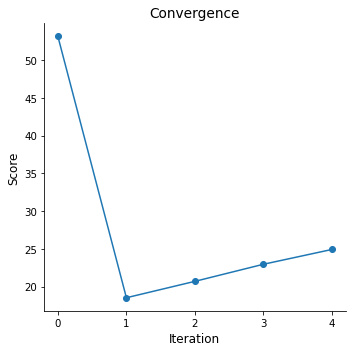

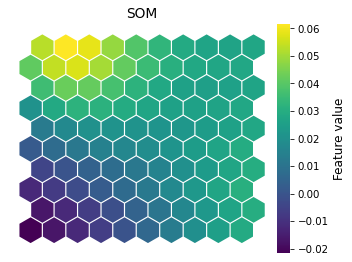

2022-06-11 15:52:56.914 | INFO     | simpsom.network:get_nodes_difference:552 - Weights difference among neighboring nodes calculated.


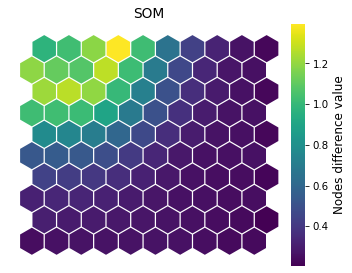

2022-06-11 15:52:57.056 | INFO     | simpsom.network:project_onto_map:579 - Projected coordinates will be saved to:
././som_projected.npy


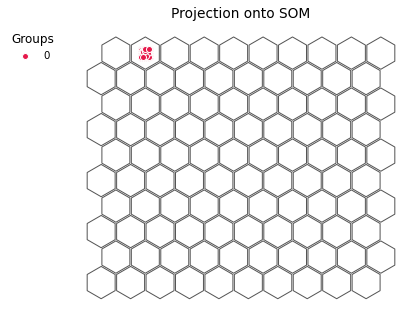

2022-06-11 15:52:57.186 | INFO     | simpsom.network:project_onto_map:579 - Projected coordinates will be saved to:
././som_projected.npy


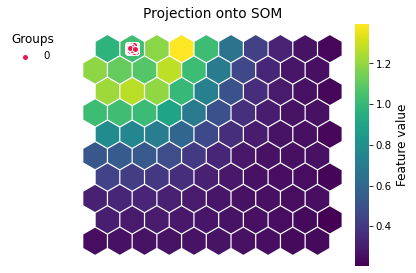

2022-06-11 15:52:57.403 | INFO     | simpsom.network:project_onto_map:579 - Projected coordinates will be saved to:
././som_projected.npy
2022-06-11 15:52:57.460 | INFO     | simpsom.network:cluster:648 - Clustering results will be saved to:
././som_clusters.npy
2022-06-11 15:52:57.466 | INFO     | simpsom.network:project_onto_map:579 - Projected coordinates will be saved to:
././som_projected.npy


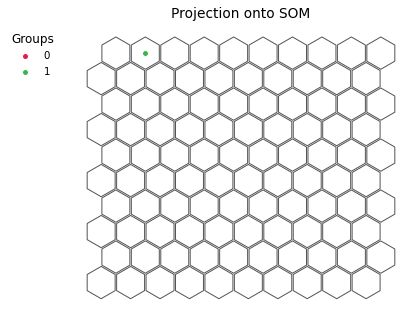

2022-06-11 15:52:57.999 | INFO     | simpsom.network:plot_clusters:849 - Clustering plot will be saved to:
././som_clustering.png
2022-06-11 15:52:58.006 | INFO     | simpsom.network:project_onto_map:579 - Projected coordinates will be saved to:
././som_projected.npy
2022-06-11 15:52:58.057 | INFO     | simpsom.network:cluster:648 - Clustering results will be saved to:
././som_clusters.npy
2022-06-11 15:52:58.063 | INFO     | simpsom.network:project_onto_map:579 - Projected coordinates will be saved to:
././som_projected.npy


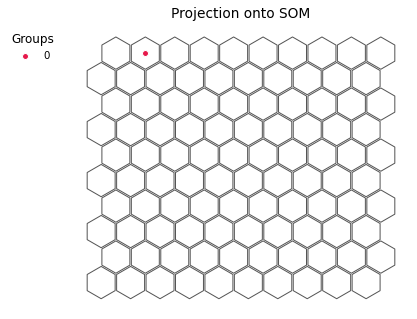

2022-06-11 15:52:58.532 | INFO     | simpsom.network:plot_clusters:849 - Clustering plot will be saved to:
././som_clustering.png
2022-06-11 15:52:58.540 | INFO     | simpsom.network:project_onto_map:579 - Projected coordinates will be saved to:
././som_projected.npy
/Users/federico comitani/GitHub/simpsom/simpsom/network.py:637: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  clu_labs = clu_algo.fit(bmu_coor).labels_
2022-06-11 15:52:58.603 | INFO     | simpsom.network:cluster:648 - Clustering results will be saved to:
././som_clusters.npy
2022-06-11 15:52:58.611 | INFO     | simpsom.network:project_onto_map:579 - Projected coordinates will be saved to:
././som_projected.npy


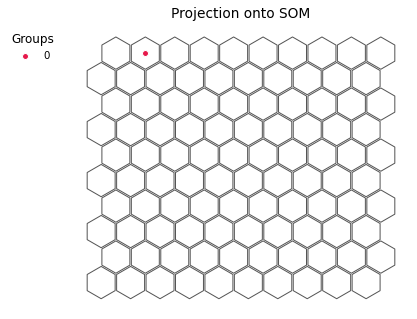

2022-06-11 15:52:59.213 | INFO     | simpsom.network:plot_clusters:849 - Clustering plot will be saved to:
././som_clustering.png
2022-06-11 15:52:59.215 | WARNING  | simpsom.network:plot_convergence:740 - The current parameters yelded no convergence. The plot will not be produced.
2022-06-11 15:52:59.218 | INFO     | simpsom.network:plot_convergence:760 - Convergence results will be saved to:
././som_convergence.png


All CPU tests done!


In [6]:
print('CPU')
for conf in confs:
    print(conf)
    run_experiment(data, **conf)
print('All CPU tests done!')

In [7]:
try:
    import cupy
    print('GPU')
    for conf in confs:
        print(conf)
        conf['GPU']=True
        run_experiment(data, **conf)
    print('All GPU tests done!')
except:
    print('No CuPy found, GPU tests will be skipped')

No CuPy found, GPU tests will be skipped


In [8]:
import random
random.shuffle(np.arange(5))